<h1 style="font-size: 40px; margin-bottom: 0px;">12.1 Principal Component Analysis</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Last week, we played around with our raw counts data in Python, and today, we'll switch over to R to start diving deeper into our counts. If you take a look at the kernel at the top right, you'll see that it's running using R rather than Python. We'll import our matrices that we created using our Python script, perform some normalization and filtering with DESeq2, and then use those values to perform a principal component analysis to get an idea of whether a notable difference exists between our control and TAZ KO replicates. By performing a principal component analysis on our replicates, we'll also be able to see whether there may have been batch effects that we may need to keep in mind in our analyses.

<strong>Learning objectives:</strong>

<ul>
    <li>Working with data in R</li>
    <ul>
        <li>Normalization using DESeq2</li>
        <li>Basic filtering</li>
    </ul>
    <li>Review concept of principal component analysis</li>
    <li>Perform a principal component analysis</li>
</ul>

<h1 style="font-size: 40px; margin-bottom: 0px;">Loading in packages</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Like with Python, R has a bunch of different packages to help with data analysis and visualization. The first thing we'll do is load in some packages and install additional ones that we'll need to normalize and filter our data, as well as perform a principal component analysis and generate plots.

<h2>Differential expression</h2>

The main package that we'll be using is called <a href="https://bioconductor.org/packages/release/bioc/html/DESeq2.html" rel="noopener noreferrer"><u>DESeq2</u></a>, which is one of the major packages commonly used to perform differential expression analysis. The other package that is also commonly used for differential expression analysis is called <a href="https://bioconductor.org/packages/release/bioc/html/edgeR.html" rel="noopener noreferrer"><u>edgeR</u></a>.

<a href="https://bioconductor.org/packages/release/bioc/html/DESeq2.html" rel="noopener noreferrer"><u>Documentation for DESeq2 can be found here.</u></a> DESeq2 was developed by Michael Love, Wolfgang Huber, and Simon Anders and published in <a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-014-0550-8" rel="noopener noreferrer"><u>Love et al 2014 Genome Biology</u></a>. This package allows us to identify differentially expressed genes from a raw counts matrix. This  <a href="https://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html" rel="noopener noreferrer"><u>A guided walkthrough example (vignette) can be found here</u></a>, and it contains helpful explanations of the different steps of DESeq2. We'll be performing a similar analysis here with some slight modifications.

<h2>Data visualization</h2>

One of the major packages for data visualization in R is <a href="https://ggplot2.tidyverse.org/" rel="noopener noreferrer"><u>ggplot2</u></a>, which was developed by <a href="https://ggplot2.tidyverse.org/authors.html" rel="noopener noreferrer"><u>Hadley Wickham, Winston Chang, Lionel Henry, Thomas Lin Pedersen, Kohske Takahashi, Claus Wilke, Kara Woo, Hiroaki Yutani, Dewey Dunnington, and Teun van den Brand</u></a>.

ggplot2 follows a specific framework to visualize data in a large variety of ways. A very basic way of viewing it is as layers of components that are added on top of each other in order to produce a final visualization. So each layer can be separately modified to produce more complex visualization. <a href="https://ggplot2.tidyverse.org/articles/ggplot2.html" rel="noopener noreferrer"><u>A more detailed explanation can be found here.</u></a>

Other packages for data visualization that we'll use are:
<ul>
    <li><a href="https://www.bioconductor.org/packages/2.8/bioc/html/hexbin.html" rel="noopener noreferrer"><u>hexbin</u></a> - to bin and plot data into hexagonal bins</li>
    <li><a href="https://www.bioconductor.org/packages/release/bioc/html/vsn.html" rel="noopener noreferrer"><u>vsn</u></a> - to visualize normalized transcriptomics data</li>
</ul>

<h2>'Omics data exploration</h2>

mixOmics is an R package containing a number of methods that facilitate both single 'omics and multivariate 'omics analyses. We'll be making use of mixOmics to perform a principal component analysis of our class transcriptome dataset to determine how our replicates compare to one another. Instead of clustering our datasets by each gene, we'll be clustering our dataset by samples.

mixOmics was developed by a core team including: Kim-Anh Le Cao, Florian Rohart, and Sebastien Dejean and published in <a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005752" rel="noopener noreferrer"><u>PLoS Comp Biol 2017.</u></a>
<a href="https://www.bioconductor.org/packages/release/bioc/html/mixOmics.html" rel="noopener noreferrer"><u>Documentation for mixOmics can be found here</u></a>, and <a href="http://mixomics.org/" rel="noopener noreferrer"><u>additional information here.</u></a> 

In [1]:
#Important note is that we're working in R now
#Conceptually/logically/in a broad sense, can think of using our understanding of Python
#Just with differences in syntax
#So Jack included more detailed/frequent break downs of the code to help with understanding

#Like with Python, we import needed packages
#It's chatty and will take a bit of time to fully install and import everything we need for this notebook
library(DESeq2)
library(ggplot2)
BiocManager::install("mixOmics")
BiocManager::install("hexbin")
BiocManager::install("vsn")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



<h1 style="font-size: 40px; margin-bottom: 0px;">Import class counts dataset and metadata file</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Like with Python, we'll have to import our dataset into a dataframe matrix, which we can normalize, filter, and perform differential expression analysis.

The syntax is different than Python, but the concept is fundamentally the same.

In [2]:
#To work with our data, we'll need to import our files
#Just that the syntax is different
#Note that R is base-1 and not base-0 for indexing
counts <- read.csv('/home/jovyan/MCB201B_F2025/Week_10/class-set/1M_class_counts_matrix.csv',
                   stringsAsFactors=FALSE,
                   row.names=1
                   )

In [3]:
#Sanity check
head(counts)

,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,1,0,2,5,NA,NA,3,1,3,1,2,0,2,0,3,9,0,0
A1BG-AS1,1,3,0,1,3,5,0,8,1,2,2,2,0,1,1,2,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2>Let's break down the code:</h2>

<code>counts</code>

This is our variable to which we will assign our dataframe matrix.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>&lt;-</code>

This is the R assignment operator that assigns a variable on the left the object on the right.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>read.csv()</code>

This is the function to read in our .csv file into a dataframe.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>'~/MCB201B_F2025/Week_10/counts/class-set/1M_class_counts_matrix.csv'</code>

This specifies the file path and file name of the .csv file that we want to load into our notebook.

<code>stringsAsFactors=FALSE</code>

This argument is refers to a data type particular to R, called a <code>factor</code>. This data type represents categorical data, allowing it to be ordered if needed by assigning them pre-defined values called levels. This comes in handy when plotting, where you can specify the ordering of your categrorical data by pre-defining their levels.

By setting this argument to <code>FALSE</code>, we stop R from converting our strings to factors.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>row.names=1</code>

This argument sets the index of our dataframe as the first column in our .csv file. Another way of reading this is that the names of each row is the values of the first column. 

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<h2>Sanity check</h2>

Now let's take a look at the first 6 rows of our imported dataframe to make sure it imported correctly.

In [4]:
head(counts)

,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,1,0,2,5,NA,NA,3,1,3,1,2,0,2,0,3,9,0,0
A1BG-AS1,1,3,0,1,3,5,0,8,1,2,2,2,0,1,1,2,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Like with Python and Terminal, <code>head</code> refers to the first set of rows in your data. In Python, the default head is 5 rows. For Terminal, it's 10 rows. And for R, it's 6 rows.

If we want to specify 5 rows, we would just provide an extra argument indicating the number of rows we want to display.

In [5]:
#Like with Python (and also bash), we can add additional argument to specify how many rows we want to pull from the head
head(counts, 5)

,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,1,0,2,5,NA,NA,3,1,3,1,2,0,2,0,3,9,0,0
A1BG-AS1,1,3,0,1,3,5,0,8,1,2,2,2,0,1,1,2,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h1 style="font-size: 40px; margin-bottom: 0px;">Group exercise: Import metadata file</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Now let's work together to see if we can import your metadata file using the same setup that we used above. And we can name the variable <code>conditions</code>.

In [6]:
#Import our "metadata" file
conditions <- read.csv('/home/jovyan/MCB201B_F2025/Week_10/class-set/1M_class_conditions_matrix.csv',
                       stringsAsFactors=FALSE,
                       row.names=1
                       )

Then, check the first five rows to make sure the file imported correctly.

In [7]:
#Sanity check
head(conditions, 5)

,condition
,<chr>
ctrl_g1,control
tazko_g1,tazko
ctrl_g2,control
tazko_g2,tazko
ctrl_g3,control


<h1 style="font-size: 40px; margin-bottom: 0px;">Prepare data matrices to feed to DESeq2</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

To get our data ready for DESeq2, we'll first filter out genes that are not expressed in order to reduce the amount of data that we're working with. Although we can leave these in, some of the normalizations and data visualization will be neater and more memory efficient if we filter out these genes first.

We'll set that genes that have 0 counts in all replicates will be considered as not expressed, and those will be the rows that we filter out. In other words, we are looking to create a new dataframe containing rows whose mean count is greater than 0.

<h2>Calculate mean of each row</h2>

First, we'll calculate the mean counts for each gene:

In [8]:
#We set up for filtering
#First calculate the mean
#Conceptually the same as how we operate on pandas DataFrames
means <- apply(counts, 1, mean)

In [9]:
#We can check the means
head(means, 10)

A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1     A2MP1   A3GALT2 
       NA  1.777778  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 
   A4GALT     A4GNT 
10.888889  0.000000

<h2>Let's break down the code:</h2>

<code>means</code>

This is our variable in which we will save the results of our calculations.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>&lt;-</code>

This is our assignment operator.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>apply()</code>

This function allows us to perform calculations on our data matrix across the values in a row <code>1</code> or all values in a column <code>2</code>. We can specify the dataframe that we're operating on and the type of calculation to perform.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>counts</code>

Here, we specify that we want to perform calculations on the data contained within our <code>counts</code> dataframe.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>1</code>

By specifying 1 for the <code>margin</code> parameter, we indicate that we want to perform some calculation across all the values in each row. This is similar to specifying the axis for DataFrame operations in Python using pandas.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>mean</code>

The calculation will perform is specified by <code>mean</code>, so we'll be taking the average of all values across each row. In other words, we're calculating the average read count for each gene.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

Now let's take a quick look to see how everything looks.

In [10]:
head(means, 10)

A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1     A2MP1   A3GALT2 
       NA  1.777778  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 
   A4GALT     A4GNT 
10.888889  0.000000

<h2>Filter out non-expressed genes</h2>

Now, we'll filter out genes that are not expressed in any of our replicates to minimize the memory needed to perform normalizations and to make our visualizations a bit neater.

In [11]:
#Syntax is nearly the same as Python
#Use conditional to evaluate which rows to pull from matrix
#Rows that satisfy the condition means>0 will be pulled/subsetted
#And we reassign it back to counts variable
#Note the TWO dimensions within the square brackets
#We pull specific rows and all columns
counts <- counts[which(means>0), ]

<h2>Let's break down the code:</h2>

<code>counts</code>

We're reassigning our filtered data back to the variable <code>counts</code>

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>&lt;-</code>

This is our assignment operator.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>counts[which(means>0),]</code>

This set up here is very similar to how we filter our pandas DataFrames. We specify the dataframe that we want to filter <code>counts[rows, columns]</code>, and then we indicate that we want to filter rows whose means are greater than 0 <code>which(means>0)</code>.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

Let's do another sanity check to see how things look now.

In [12]:
#Sanity check
head(counts, 5)

#We paused here

,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG-AS1,1,3,0,1,3,5,0,8,1,2,2,2,0,1,1,2,0,0
A4GALT,8,8,15,9,17,8,12,10,5,19,9,8,8,9,20,13,6,12
AAAS,18,28,25,24,40,33,29,27,28,27,26,16,40,30,26,49,29,24
AACS,24,29,32,25,35,27,28,29,37,27,33,21,35,20,20,31,26,37
AADAT,1,4,4,1,5,4,7,5,4,1,2,4,3,6,5,5,4,8


<h1 style="font-size: 40px; margin-bottom: 0px;">Create a <code>DESeqDataSet</code></h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Now, we'll begin making use of the DESeq2 package, first to create a type of <code>SummarizedExperiment</code> called a <code>DESeqDataSet</code>. 

<a href="https://www.bioconductor.org/packages/devel/bioc/vignettes/SummarizedExperiment/inst/doc/SummarizedExperiment.html" rel="noopener noreferrer"><u>A general overview of a <code>SummarizedExperiment</code></u></a> is that it's a type of object that holds data, metadata, calculations, and outputs. These features can be thought of similar to attributes in Python that can be pulled out of the <code>SummarizedExperiment</code>. The <code>DESeqDataSet</code> is an extension of the <code>RangedSummarizedExperiment</code> class. 

We'll load into a <code>DESeqDataSet</code> our <code>counts</code>, our <code>conditions</code> metadata, and specify our experiment design formula.

In [13]:
#We take our matrices (both our class counts and our "metadata") and feed it into DESeq
#This will set up a DESeqDataSet object, which will hold all the raw data and intermediate calculations
#We also specify the design, which we indicate with design = ~ condition
#This argument can be read as the design for the analysis is dependent on the information in the condition column pulled from colData, our metadata matrix
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = conditions,
                              design = ~ condition
                              )

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


<h2>Let's break down the code:</h2>

<code>dds</code>

This is the variable to which we are assigning our <code>DESeqDataSet</code>.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>DESeqDataSetFromMatrix()</code>

This function creates a <code>DESeqDataSet</code> based on the arguments we pass to it.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>countData = counts</code>

We pass to the <code>DESeqDataSetFromMatrix()</code> our counts dataframe. It's important that you provide it with your raw counts because DESeq2 will normalize the data assuming that you are providing it with raw counts.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>colData = conditions</code>

We also load in our metadata matrix containing the corresponding condition for each sample. Note that the order in which your samples are in is important because DESeq2 assumes that the order in which they appear in your <code>counts</code> matrix is the same as the order that they are organized in your metadata matrix. If they are not in the same order, then you will need to reorder them so that they match up.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>design = ~ condition</code>

Here, we specify the experimental set up for our transcriptome dataset. Essentially, we are telling DESeq2 how we want it to perform the comparison. Since we only have two conditions, only the order of the levels matters, since that will determine how we interpret the positive/negative outputs of the differential expressioin analysis.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

Let's take a look at what the DESeqDataSet contains:

In [14]:
#We can take a look at the dds object we created
dds
#Can see that it's set up like an R-specific object called a SummarizedExperiment
#It holds raw data and intermediate calculations and outputs

class: DESeqDataSet 
dim: 17306 18 
metadata(1): version
assays(1): counts
rownames(17306): A1BG-AS1 A4GALT ... ZZEF1 ZZZ3
rowData names(0):
colnames(18): ctrl_g1 tazko_g1 ... ctrl_g9 tazko_g9
colData names(1): condition

We can also pull out our raw counts out of this dataset since it still contains the original data.

In [16]:
#We can access raw data through different accessors
#In this case, using counts() accessor function
head(counts(dds), 5)
#We feed the output into head() since we are just taking a quick look at the first set of rows

,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
A1BG-AS1,1,3,0,1,3,5,0,8,1,2,2,2,0,1,1,2,0,0
A4GALT,8,8,15,9,17,8,12,10,5,19,9,8,8,9,20,13,6,12
AAAS,18,28,25,24,40,33,29,27,28,27,26,16,40,30,26,49,29,24
AACS,24,29,32,25,35,27,28,29,37,27,33,21,35,20,20,31,26,37
AADAT,1,4,4,1,5,4,7,5,4,1,2,4,3,6,5,5,4,8


<h1 style="font-size: 40px; margin-bottom: 0px;">Estimate size factors</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Now, let's estimate the size factors for our dataset. In other words, this is the information that controls for differences in library size and the final number of counted reads that were assigned to an annotated gene. 

Since we truncated our dataset down to 1M reads for all our samples, you'll see that all the size factors are estimated to be approximately 1.

Here, we'll estimate the size factors and add the data into our <code>DESeqDataSet</code>.

In [17]:
#We can operate on our dds object
#Here we calculate the size factors using estimateSizeFactors()
#Then we save the results of that calculation back into the dds object
#Recall that it's a type of SummarizedExperiment object, so it can hold the outputs of this intermediate calculation
dds <- estimateSizeFactors(dds)

Like how we pulled out our raw counts using <code>counts()</code>, we'll use the function <code>sizeFactors()</code> to pull the estimated size factors out of our dataset.

In [18]:
#We can then pull out those results using another accessor fucntion sizeFactors()
sizeFactors(dds)

ctrl_g1  tazko_g1   ctrl_g2  tazko_g2   ctrl_g3  tazko_g3   ctrl_g4  tazko_g4 
1.0068520 0.9695858 1.0328036 0.8743209 1.0557931 1.1197082 0.9805242 1.0798009 
  ctrl_g5  tazko_g5   ctrl_g6  tazko_g6   ctrl_g7  tazko_g7   ctrl_g8  tazko_g8 
1.0425994 1.0622436 1.0423191 0.8029407 1.0350246 1.0946381 1.0325323 1.0912407 
  ctrl_g9  tazko_g9 
0.9292215 1.1125238

<h1 style="font-size: 40px; margin-bottom: 0px;">Pull out normalized counts data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

In order to be able to compare our counts between samples, we first need to normalize our counts. There are a number of different normalization methods, and Dr. Ingolia touched on a few of them in lecture. DESeq2 normalizes raw count data using a median of ratios method.

To pull out normalized counts from our dataset, we can make use of the <code>counts()</code> function like we did previously to pull out our raw counts, but we can provide it with an additional argument <code>normalized = TRUE</code> to get the normalized counts.

In [19]:
#With our size facators esimated, we can then pull out normalized counts
#We make use of the counts() accessor function, but specify that we want the normalized counts instead of raw counts
head(counts(dds, normalized=TRUE), 5)

,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
A1BG-AS1,0.9931946,3.094105,0.000000,1.143745,2.841466,4.465449,0.000000,7.408773,0.9591412,1.8828073,1.918798,2.490844,0.000000,0.9135439,0.9684927,1.832776,0.000000,0.000000
A4GALT,7.9455569,8.250946,14.523575,10.293703,16.101640,7.144719,12.238351,9.260966,4.7957058,17.8866696,8.634592,9.963376,7.729285,8.2218953,19.3698538,11.913046,6.457018,10.786287
AAAS,17.8775031,28.878310,24.205958,27.449875,37.886211,29.471964,29.576015,25.004609,26.8559523,25.4178989,24.944376,19.926752,38.646424,27.4063178,25.1808100,44.903018,31.208920,21.572573
AACS,23.8366708,29.909678,30.983626,28.593619,33.150435,24.113425,28.556153,26.856802,35.4882227,25.4178989,31.660170,26.153863,33.815621,18.2708785,19.3698538,28.408032,27.980411,33.257717
AADAT,0.9931946,4.125473,3.872953,1.143745,4.735776,3.572359,7.139038,4.630483,3.8365646,0.9414037,1.918798,4.981688,2.898482,5.4812636,4.8424635,4.581941,4.304679,7.190858


Let's take a look at the normalized counts.

In [21]:
#See above code cell for viewing normalized counts
#This line below is to save it to a new variable
norm.counts <- counts(dds, normalized=TRUE)

Let's save this dataframe as a <code>.csv</code> for later.

In [22]:
#Like with Python, we can take a look to see what our working directory is
#Conceptually the same, just with different syntax
getwd()

[1] "/home/jovyan/MCB201B_F2025/Week_12"

In [23]:
#Same here, conceptually the same, just different syntax
#Here we set our current working directory
#We've just been outputting the results of our RNA-seq analysis so far into Week 10 for consistency
setwd('/home/jovyan/MCB201B_F2025/Week_10')

In [24]:
#Quick check
getwd()

[1] "/home/jovyan/MCB201B_F2025/Week_10"

In [26]:
#We can also create directories in R like we do in Python and bash
dir.create('differential-expression-analysis', showWarning=FALSE)
#The nice thing is that R does not error out when the directory already exists
#It'll just prompt us with a warning, which we can suppress using showWarning=FALSE

In [27]:
#Export our data matrix containing our  normalized counts as a .csv file
#Same as what we've done in Python using pandas, but with a different syntax
write.csv(norm.counts, './differential-expression-analysis/1M_class_norm_counts.csv')

<h1 style="font-size: 40px; margin-bottom: 0px;">Visualize count variances</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

Let's do a quick visualization of the variance in our data to get an idea of where the variance lies in our data. Genes that don't vary much or at all between samples aren't informative for a principal component analysis, while those that do can be used to cluster our samples. 

We'll take a look at two types of normalizations of our dataset. One is the standard log2 transformation, and another is a regularized log transformation, which accounts for the fact that low count genes will have higher variance.

<h2>Perform an log2 transformation on normalized counts</h2>

We'll first take a look at our dataset after a standard log2 transformation using the <code>normTransform()</code> function.

In [28]:
#In order to cluster our data, we'll want to identify where the variation exists since this will allow us to differentiate samples more easily
#For this example, we perform a log2 transformation
#So that we can better differentiate/separate things out, kind of like how we use log scale for plotting to visually separate out our scatterplot dots
log2.norm.counts <- normTransform(dds)
#Here we save the results of the calculation to a new variable

Let's pull out the normalized, log2 transformed counts using the <code>assay()</code> accessor function.

In [29]:
#Sanity check pulling out the log2 transformed normalized counts using the assay() accessor function
head(assay(log2.norm.counts), 5)

,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
A1BG-AS1,0.9950826,2.033548,0.000000,1.100133,1.941657,2.450340,0.000000,3.071895,0.9702213,1.5274744,1.545374,1.803576,0.000000,0.936247,0.9770914,1.502217,0.000000,0.000000
A4GALT,3.1611713,3.209601,3.956389,3.497447,4.096063,3.025865,3.726652,3.359095,2.5349844,4.2392964,3.268224,3.454620,3.125863,3.205063,4.3483637,3.690757,2.898599,3.559037
AAAS,4.2385960,4.901027,4.655693,4.830350,5.281187,4.929411,4.934329,4.700695,4.7999137,4.7234438,4.697350,4.387277,5.309119,4.828140,4.7104378,5.520517,5.009388,4.496499
AACS,4.6343999,4.949987,4.999262,4.887214,5.093832,4.650387,4.885387,4.799958,5.1893590,4.7234438,5.029460,4.763086,5.121663,4.268350,4.3483637,4.878138,4.857006,5.098357
AADAT,0.9950826,2.357685,2.284796,1.100133,2.519989,2.192939,3.024858,2.493259,2.2739827,0.9571001,1.545374,2.580553,1.962912,2.696275,2.5465768,2.480767,2.407265,3.034015


<h2>Plot the standard deviation of data</h2>

We'll now make use of the <code>meanSdPlot()</code> function of the <code>vsn</code> package to visualize the standard deviation of our counts.

<a href="https://www.bioconductor.org/packages/release/bioc/manuals/vsn/man/vsn.pdf" rel="noopener noreferrer"><u>Documentation for vsn including <code>meanSdPlot()</code> is here.</u></a>

In [30]:
#We can then feed the transformed data to the meanSdPlot() function that is part of the vsn package
#Conceptually the same as Python where we call up the package followed by the function, but syntax is different
#We then feed it our transformed data
log2.norm.plot <- vsn::meanSdPlot(assay(log2.norm.counts), plot=FALSE)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the vsn package.
  Please report the issue to the authors.”


<h2>Let's break down the code:</h2>

<code>log2.norm.plot</code>

This is our variable that we'll assign our output to.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>&lt;-</code>

This is the assignment operator to assign the output to the <code>log2.norm.plot</code> variable.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>vsn::meanSdPlot()</code>

We call up the <code>meanSdPlot()</code> function. Since we just installed the library and didn't load it like we did with DESeq2 and ggplot2, we'll need to call up the package first (kind of like what we do in Python). In this case, the syntax is <code>vsn::</code>.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>assay()</code>

This is an accessor function that allows us to pull our data out of the <code>DESeqDataSet</code>, kind of like the <code>counts()</code> function.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>log2.norm.counts</code>

We specify the data that we want to pull out.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>plot=FALSE</code>

We can opt to generate a plot later by pulling out the <code>gg</code> element. 

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<h2>Plot a hexplot</h2>

<a href="https://www.bioconductor.org/packages/release/bioc/html/vsn.html" rel="noopener noreferrer" target="_blank"><u>In the documentation for the vsn package</u></a>, you can access the ggplot object by pulling it out and modifying it by layering on additional plot components via ggplot2.

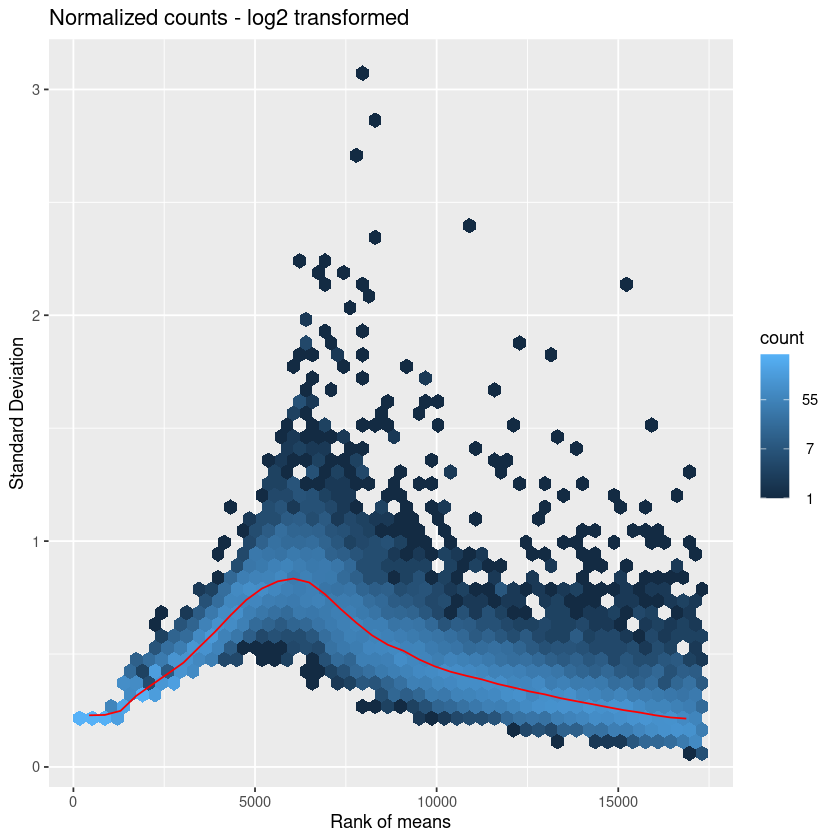

In [38]:
#We can then pull out the plot for adjusting by pulling out the gg element
#Can think about plotting in R as starting with a base plotting area
#That you then add on layers to, which is logically represented by the + symbol
#So we specify the gg plot element from the meanSdPlot() function's output
#Then we add on the title, add the xlabel, and add the ylabel
log2.norm.plot$gg +
    ggtitle('Normalized counts - log2 transformed') +
    xlab('Rank of means') +
    ylab('Standard Deviation')

#Each hexagon in the plot is a bin containing the number of genes falling into that bin
#So higher counts =  more genes there
#This is essentially visualization of the distribution of standard deviations with respect to the  mean
#But rather than directly plotting the mean, we plot the ranks of the means
#So then rank closer to zero indicates lower mean read count for that gene, calculated across all samples
#We can see that there is a notable bump towards the lower end of ranks
#This is because with lower read counts, it is more sensitive to statistical noise, which accounts for the variation we see
#So those genes will have the largest standard deviation which we see as the bump
#With greater mean read counts, it is less sensitive to statistical noise, so the difference we see is biological differences
#So to properly cluster, we cannot use the log2 transformed data since we'll then cluster by random noise in our samples rather than actual biological differences

<h2>Perform a regularized log (rlog) transformation of data</h2>

Let's compare how the variation looks like when we take into account the fact that lowly expressed genes will have higher variance by performing a regularized log transformation and then plotting the standard deviation of the rlog transformed data.

In [39]:
#So to account for the fact that genes with less mean read counts will have their variance explained more by noise than biological differences
#We perform a regularized log transformation to take that into account
rld <- rlog(dds, blind=FALSE)

This type of transformation isn't performed on counts for differential analysis. Instead, this type of transformation is used for data visualization and clustering.

In [41]:
#Run the meanSdPlot function for our regularized log transformed data
rld.plt <- vsn::meanSdPlot(assay(rld), plot=FALSE)

<h2>Plot standard deviation after rlog transformation</h2>

Let's take a look at the regularized log transformed variance of our class data using the same <code>meanSdPlot()</code> function that we used earlier.

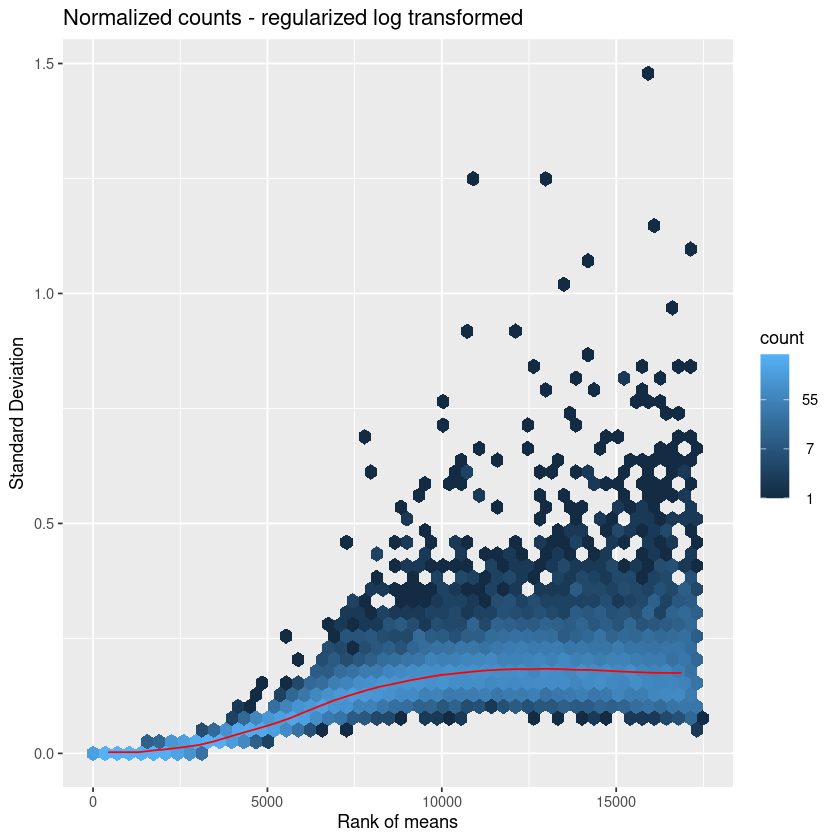

In [47]:
#We plot the output of meanSdPlot() for our regularized log transformed data
rld.plt$gg +
    ggtitle('Normalized counts - regularized log transformed') +
    xlab('Rank of means') +
    ylab('Standard Deviation')

#You should be able to see now that that bump is gone
#and now the variation we're visualizing should primarily be due to biological differences
#rather than statistical noise

You should see that the resulting plot looks quite different, and the lower ranked genes no longer have an extremely high variance that swamps out the rest of the dataset.

<h1 style="font-size: 40px; margin-bottom: 0px;">Pull top 500 variable genes for principal component analysis</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

As briefly mentioned previously, we'll focus on the most variable genes in our dataset since that will allow us to perform clustering on our samples. Genes that are not highly variable don't provide much helpful information for us when grouping our samples.

We'll want to work with just the rlog transformed counts, so first, how do we get our rlog transformed counts?

In [48]:
#So we want to then use the regularized log tranformed counts to perform clustering
#to cluster based on biological differences between samples
rld.values <- assay(rld)
#We can pull ou tthose counts uing the assay() accessor function

In [49]:
#Sanity check
head(rld.values, 5)

,ctrl_g1,tazko_g1,ctrl_g2,tazko_g2,ctrl_g3,tazko_g3,ctrl_g4,tazko_g4,ctrl_g5,tazko_g5,ctrl_g6,tazko_g6,ctrl_g7,tazko_g7,ctrl_g8,tazko_g8,ctrl_g9,tazko_g9
A1BG-AS1,0.7068786,0.8120155,0.6527288,0.7167444,0.8022722,0.8857416,0.6551954,1.018753,0.7044178,0.7531351,0.7548956,0.7788609,0.6526265,0.7009725,0.7051029,0.7506286,0.6577312,0.6491776
A4GALT,3.2876050,3.3013381,3.5358631,3.3808780,3.5912421,3.2488007,3.4527184,3.339091,3.1499005,3.6506914,3.3144826,3.3694979,3.2775404,3.2958968,3.6952850,3.4430106,3.2311329,3.3997760
AAAS,4.5193795,4.8242192,4.7018754,4.7886125,5.0360691,4.8403210,4.8415413,4.722763,4.7727276,4.7342826,4.7218052,4.5961136,5.0514697,4.7869377,4.7283717,5.1830791,4.8799990,4.6243430
AACS,4.6950170,4.8519984,4.8790606,4.8191353,4.9312851,4.6997753,4.8187214,4.774983,4.9846295,4.7367835,4.8955699,4.7599314,4.9461821,4.5275091,4.5656085,4.8153560,4.8042413,4.9353084
AADAT,1.8253944,1.9785387,1.9668715,1.8427971,2.0077177,1.9519038,2.1113982,2.003129,1.9651247,1.8187203,1.8706125,2.0130347,1.9197832,2.0432847,2.0122620,2.0009775,1.9863676,2.1213394


Once we have our rlog transformed counts, what should we do next?

In [55]:
#We can then pull out the top 500 in a single line
#Breaking down this line into constitutent parts
#rowVars(rld.values) => This calculates variance across rows (i.e for each gene)
#order( xxxxx, decreasing=TRUE) => this outputs row values for variance sorted based on decreasing value (so in decreasing variance)
#So we get row indices for genes with the greatest variance first
#rld.values[xxxxxxx, ] => Like with Python, we can use the row indices as a guide to filter our data
#In this case, we're "filtering" to resort our data.frame
#head(xxxxxxxxxx, 500) => This is to pull out the first 500 rows of our sorted data, leaving us with the top 500 gene based on their variance
top500.var.rld <- head(rld.values[order(rowVars(rld.values), decreasing=TRUE), ], 500)

Then once we have our sorted data, how do we get the top 500 genes?

<h1 style="font-size: 40px; margin-bottom: 0px;">Perform a principal component analysis</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

With our top 500 genes that have the highest variance, we can perform a principal component analysis. We'll use the mixOmics package's <code>pca()</code> function to calculate the proportion of explained variance for the first 10 principal components. Then we'll use ggplot2 to generate a biplot, where we plot principal component 1 against principal component 2 and visualize how the clusters separate out from one another.

<a href="https://www.bioconductor.org/packages/release/bioc/manuals/mixOmics/man/mixOmics.pdf" rel="noopener noreferrer"><u>Documentation for mixOmics, including <code>pca()</code> is here.</u></a>

In [56]:
#Since we want to cluster based on the sample rather than the gene, we transpose our data.frame
#This uses the t() function
#Example is below where we feed the output to the head function to take a look at the transposed matrix
head(t(top500.var.rld), 5)

,CEMIP,EGR1,FOS,DKK1,F3,SPINT2,FST,SCD,UCA1,HLA-A,⋯,NFE2L3,STK26,MYO10,SNX30,CALR,SPATA5,EREG,RPL21,ADD3,GALNT3
ctrl_g1,7.778476,7.376877,6.848400,8.201650,9.407502,6.664587,6.263719,8.063736,5.492438,4.481088,⋯,7.630381,3.631259,6.030626,4.330070,10.083729,3.721832,5.015040,7.996788,6.131953,4.247485
tazko_g1,5.075712,7.529571,6.673900,6.002550,7.233544,4.892597,4.610173,6.724788,3.615253,4.764209,⋯,8.126781,3.147453,6.808580,4.970463,9.720946,4.027661,5.312197,7.689214,5.655046,3.952876
ctrl_g2,8.252899,6.111823,5.693841,8.223834,9.278503,6.902003,6.691523,8.436120,5.295566,4.830224,⋯,7.677352,4.041111,6.097510,4.209675,10.333892,3.630749,4.971221,7.666184,6.293344,4.729345
tazko_g2,5.454622,6.416448,6.284588,6.088540,7.319420,4.872953,4.449894,6.607961,3.659148,4.930462,⋯,8.132549,3.541407,6.822037,5.071548,9.731704,4.116918,5.418027,7.640782,5.645952,3.920784
ctrl_g3,8.229092,7.000158,5.994511,8.041921,9.366948,6.735372,6.502675,8.708239,5.478746,6.507533,⋯,7.615867,4.027901,6.242728,4.661923,10.306981,3.949325,5.002715,7.502684,6.098397,4.367164


In [57]:
#We then feed the transformed matrix to mixOmic's pca function to calculate the principal components
#Here we provide it with the ncomps argument in order to specify that we want it to calculate the first 10 principal components
pca.out <- mixOmics::pca(t(top500.var.rld), ncomp = 10)

<h2>Let's break down the code:</h2>

<code>pca.out</code>

This is the variable to which we will assign our PCA results.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>&lt;-<code>

This is our assignment operator.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>mixOmics::</code>

We're calling up a function of the mixOmics package.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>pca()</code>

Specifically, the function that we're calling up is the <code>pca()</code> function.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>t(top500.var.rld)</code>

This argument consists of two parts. The first part is the <code>t()</code> function, which transposes our dataset, much like how we can transpose a pandas DataFrame. Since the <code>pca()</code> function uses the rows to determine clustering, we need to transpose our dataset. The second part is <code>top500.var.rld</code>, which is the dataframe containing our rlog transformed counts. This will be transposed by the <code>t()</code> function, and then passed to the <code>pca()</code> function.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>ncomp = 10</code>

This argument specifies the number of principal components that we will be calculating. We'll calculate ten principal components.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<h2>Let's take a look at whats contained in our PCA results</h2>

In [58]:
#We can take a look at the output to see the eigenvalues and proportion of explained variance
pca.out
#We can pull out values from the pca function's output for plotting and labeling as well

  Eigenvalues for the first 10 principal components, see object$sdev^2: 
       PC1        PC2        PC3        PC4        PC5        PC6        PC7 
89.2185434  6.1840871  3.6985552  1.7012103  1.4893960  1.2455567  0.9851685 
       PC8        PC9       PC10 
 0.9395150  0.8478593  0.7686126 
  
  Proportion of  explained variance for the first 10 principal components, see object$prop_expl_var: 
        PC1              PC2              PC3              PC4      
0.802462316      0.055621810      0.033266079      0.015301272      
        PC5              PC6              PC7              PC8      
0.013396141      0.011202966      0.008860944      0.008450322      
        PC9             PC10      
0.007625938      0.006913167      
  
  Cumulative proportion of  explained variance for the first 10 principal components, see object$cum.var: 
      PC1            PC2            PC3            PC4            PC5      
0.8024623      0.8580841      0.8913502      0.9066515      0.9200

<h1 style="font-size: 40px; margin-bottom: 0px;">Visualize PCA as a biplot</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

With the results from our principal component analysis, we can begin setting up a biplot, where we plot the first principal component (PC1) against the second one (PC2).

Since PC1 and PC2 together explain the large proportion of the variance in our dataset, we should be able to see samples cluster away from each other. 

And if we plot other principal components, we wouldn't expect such obvious clustering.

<h2>Pull proportion of explained variance into a new dataframe</h2>

To make plotting a little bit simpler, we'll create a new dataframe containing just the proportion of explained variance. So when we want to pull these values to label our axes, we can simply use a similar notation to the one we used in Python.

So first, we'll create the dataframe:

In [61]:
#We can pull out the proportion of epxplained variance
#And we can convert to a data.frame
pro.var.expl <- as.data.frame(pca.out$prop_expl_var)

<h2>Let's break down this line of code:</h2>

<code>pro.var.expl</code>

This is our variable that will point to our new dataframe.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>&lt;-</code>

This is our assignment operator.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>as.data.frame()</code>

This converts an object into a data frame. Conceptually, it's similar to <code>pd.DataFrame()</code> that we're familiar with in Python. 

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>pca.out</code>

This is the variable to which we previously assigned our PCA results. <a href="https://www.bioconductor.org/packages/release/bioc/manuals/mixOmics/man/mixOmics.pdf" rel="noopener noreferrer"><u>If we dig into the documentation</u></a>, we can see that the output of mixOmics' <code>pca()</code> function is a <code>pca</code> class object that contains different information that we can pull out.

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>$</code>

This is an operator in R that allows us to pull out values out of an object, such as a matrix, or in this case a <code>pca</code> class object. 

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

<code>prop_expl_var</code>

We're pulling out a list of values from our variable <code>pca.out</code>, and we're specifically pulling out the proportion of explained variance, which has the value <code>prop_expl_var</code>. 

<hr style="border: 1px solid; border-color: #AAAAAA;"></hr>

So with this line of code, we'll have a dataframe that contains the calculated proportion of explained variance for our ten principal components.

<h2>Let's take a quick look at the dataframe</h2>

In [62]:
#Quick check
pro.var.expl
#Can see here we're just looking at proportion of explained variance
#PC1 explains the large majority of the variance in our data
#And PC2 explains a little
#So PC1 and PC2 together explain more or less almost all the variance
#So it can be informative for clustering our data

,X
,<dbl>
PC1,0.802462316
PC2,0.055621810
PC3,0.033266079
PC4,0.015301272
PC5,0.013396141
PC6,0.011202966
PC7,0.008860944
PC8,0.008450322
PC9,0.007625938


<h2>Pull coordinate values for each sample's principal components</h2>

We can pull out the coordinate information for each of our samples from our <code>pca.out</code> object and use that information to generate a biplot. <a href="https://www.bioconductor.org/packages/release/bioc/manuals/mixOmics/man/mixOmics.pdf" rel="noopener noreferrer" target="_blank"><u>If we dig into the documentation for mixOmics' <code>pca()</code> function</u></a>, we can see that among the things that we can pull from the output, one of them is the <code>variates</code>, which contains the coordinate information for each sample when it's projected on each principal component. Recall from Dr. Ingolia's lecture that principal component analysis is one way of reducing the dimensionality of a dataset while still preserving the information of the original dataset.

So to pull out the coordinate information:

In [63]:
#We can then pull out the coordinate values along each principal component
#Recall from Dr. Ingolia's lecture that we can reconsitute the original position in the hyperdimensional space (~17K genes) with a small number of principal components
#Essentially, this treats each principal component as an axis that you can plot the coordinate value on
pca.coord <- pca.out$variates

Let's take a look at the object:

In [64]:
#Quick check
pca.coord

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ctrl_g1,-8.777426,-4.5270924,0.01336232,-1.2922367,0.01210761,2.92117305,-1.0162466,0.2497923,0.59952313,-0.40543666
tazko_g1,8.642772,-4.5974483,-1.34681561,-0.4095571,-0.43679259,-0.31119687,-0.5383636,0.2729655,-1.66047418,-0.78158564
ctrl_g2,-9.335478,-1.7402438,1.02691836,-2.7183545,0.95529822,-2.50749647,0.1725042,1.2575888,1.40638052,0.15322637
tazko_g2,8.413716,-2.7219762,-0.92708504,0.5379071,-0.23867583,-0.38900918,0.3272649,0.3339584,-0.39046475,0.47042958
ctrl_g3,-9.325307,-3.4536037,2.46612365,2.8190135,-0.34347407,-0.64917658,0.2482218,-1.5689771,0.84689398,0.84860717
tazko_g3,9.711524,-2.2216409,1.88888138,-0.4642870,0.15902839,-0.41322576,0.8729133,-0.7857629,-0.76050250,0.56515811
ctrl_g4,-10.280752,0.5017949,-5.00575380,0.3889882,1.89855463,-0.21141384,0.7157540,-1.3626945,0.42349234,-0.76873946
tazko_g4,9.494534,0.3133018,-1.16405169,1.1156858,-0.29330568,0.78620870,1.1497906,1.1949816,0.90265725,-0.33946002
ctrl_g5,-9.264000,1.5827582,-0.89717212,-0.7504654,-2.51795829,-0.95935208,0.6871944,-0.2832940,-1.27020814,0.06772915
tazko_g5,8.301842,1.5176491,-1.39574045,0.8889275,0.16702488,-0.94355073,-2.6768660,0.2294730,0.06492254,0.65801986


We can then pull out the matrix contained within the list <code>X</code> to use to create our dataframe:

In [66]:
pca.coord <- pca.coord$X

And we can create a dataframe from it:

In [67]:
pca.coord <- as.data.frame(pca.coord)

We can also do this in a single line as follows:

In [68]:
pca.coord <- as.data.frame(pca.out$variates$X)

pca.coord

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ctrl_g1,-8.777426,-4.5270924,0.01336232,-1.2922367,0.01210761,2.92117305,-1.0162466,0.2497923,0.59952313,-0.40543666
tazko_g1,8.642772,-4.5974483,-1.34681561,-0.4095571,-0.43679259,-0.31119687,-0.5383636,0.2729655,-1.66047418,-0.78158564
ctrl_g2,-9.335478,-1.7402438,1.02691836,-2.7183545,0.95529822,-2.50749647,0.1725042,1.2575888,1.40638052,0.15322637
tazko_g2,8.413716,-2.7219762,-0.92708504,0.5379071,-0.23867583,-0.38900918,0.3272649,0.3339584,-0.39046475,0.47042958
ctrl_g3,-9.325307,-3.4536037,2.46612365,2.8190135,-0.34347407,-0.64917658,0.2482218,-1.5689771,0.84689398,0.84860717
tazko_g3,9.711524,-2.2216409,1.88888138,-0.4642870,0.15902839,-0.41322576,0.8729133,-0.7857629,-0.76050250,0.56515811
ctrl_g4,-10.280752,0.5017949,-5.00575380,0.3889882,1.89855463,-0.21141384,0.7157540,-1.3626945,0.42349234,-0.76873946
tazko_g4,9.494534,0.3133018,-1.16405169,1.1156858,-0.29330568,0.78620870,1.1497906,1.1949816,0.90265725,-0.33946002
ctrl_g5,-9.264000,1.5827582,-0.89717212,-0.7504654,-2.51795829,-0.95935208,0.6871944,-0.2832940,-1.27020814,0.06772915


And another alternative is that we can subsitute <code>$variates$X</code> with <code>$x</code> (lower case x) to directly get the coordinates matrix.

In [70]:
pca.coord <- as.data.frame(pca.out$x)

<h2>Plot biplot of PC1 vs PC2</h2>

With the coordinates for our principal components, we can generate biplots to visualize the groupings of our samples. This can help us to determine if there may have been batch effects or potential issues with a sample that we may want to keep in mind during our differential expression analysis.

To generate these plots, we'll make use of ggplot2 first by starting with a basic ggplot object and then layering on additional plot components on top of it.

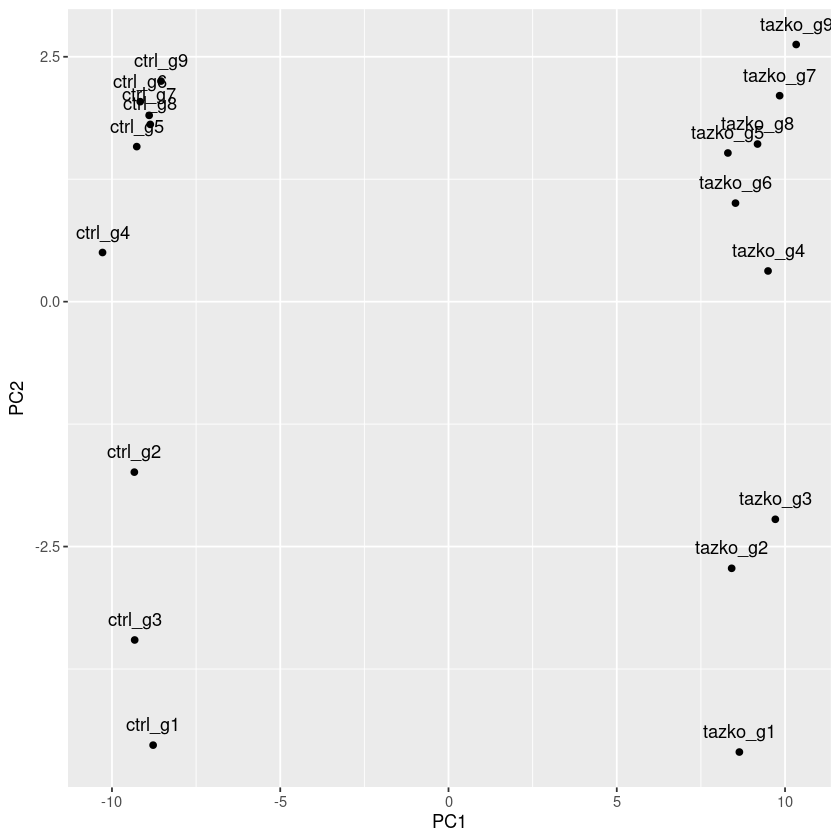

In [75]:
#Recall from lecture that one way to understand data is to reduce the dimensions of our data
#So we can reduce the dimensions down to the minimum number to differentiate between our samples and conditions
#With the coordinate values, we can then generate our biplot to visualize how our samples our clustering
#Here we create our ggplot plotting area pulling in our data (pca.coord) and specifying our axes (PC1 and PC2) from the column data
#We then add additional layers which will then add in the plot components and modify our visualization
#First we add in the dots/points corresponding to each sample usin geom_point()
#Then we add in text labels using geom_text()
#For the text labels, we specify that we want to label based on the row names (sample names) as an additional argument
#Then with additional arguments, we specify the formatting - horizontal alignment (hjust) => as the center of the text bounding box (0.5)
#And also the vertical alignment (vjust) as the bottom (-1)
ggplot(pca.coord, aes(x=PC1, y=PC2)) +
    geom_point() +
    geom_text(aes(label=rownames(pca.coord)),
              hjust=0.5,
              vjust=-1)

#We paused here - and we'll continue to update our plot for visualization

<h2>Let's look at a biplot of PC2 and PC3</h2>

For comparison's purposes, let's see how things cluster if we isntead use PC2 and PC3 which account for much less of the variance than PC1 and PC2.

What do you see for this biplot and how does it compare to PC1 vs PC2?

<h1 style="font-size: 40px; margin-bottom: 0px;">References</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 98%;"></hr>

<p><a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-014-0550-8" rel="noopener noreferrer"><u>Love et al 2014 Genome Biol:</u></a> Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2</p>

<p><a href="https://ggplot2.tidyverse.org" rel="noopener noreferrer"><u>H. Wickham. ggplot2: Elegant Graphics for Data Analysis. Springer-Verlag New York, 2016.</u></a></p>

<p><a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005752" rel="noopener noreferrer"><u>Rohart et al 2017 PLoS Comp Biol:</u></a> mixOmics: An R package for ‘omics feature selection and multiple data integration</p>